In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_excel("Data_Train.xlsx")
test = pd.read_excel("Test_set.xlsx")

print(train.shape,test.shape)

(10683, 11) (2671, 10)


In [3]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Exploratory Data Analysis

In [4]:
# Lets concatenate the train and test dataset
df =train.append(test)
df.shape

(13354, 11)

In [5]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [7]:
#Price has a lot of missing values but the are values from our test dataset which didnt have price
# Alll our features are objects
# Two missing Values

In [8]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [9]:
df.describe() # We can see that most features are objects

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [10]:
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               132
Dep_Time            223
Arrival_Time       1451
Duration            374
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [11]:
# There are a few features so we now observe each feature separately
df['Airline'].value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='count'>

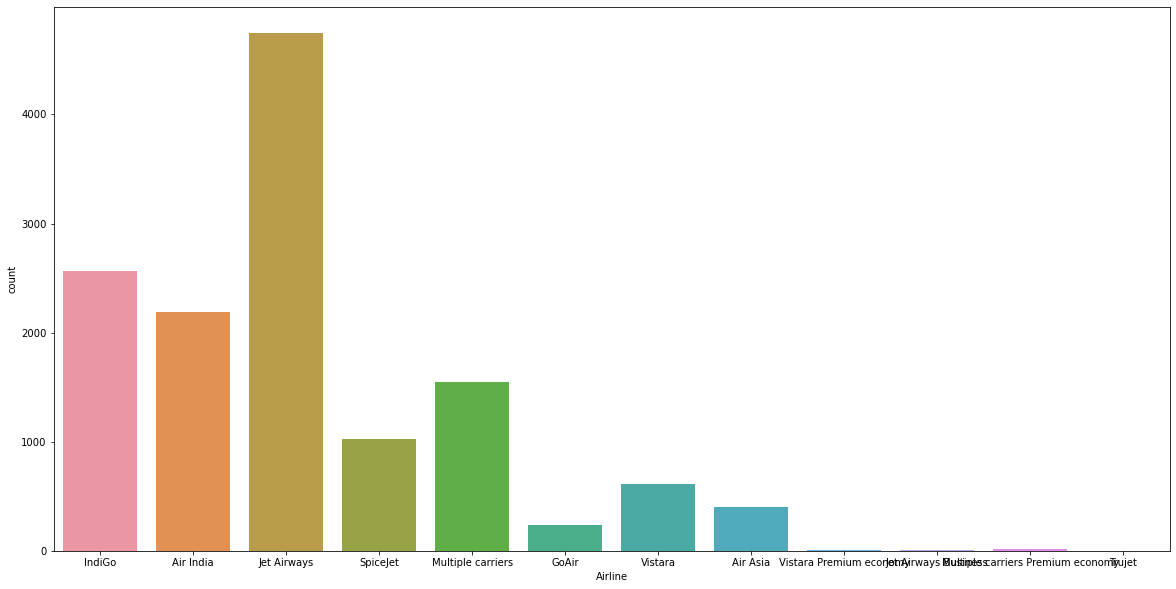

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(df['Airline'])

In [13]:
# Jet Airways has many passengers and Trujet has just one.We can also observe that the premium and business class airline have very few passengers.
# We can also assume Trujet is also either a business or economy class


In [14]:
df['Date_of_Journey'].value_counts().sort_index()

01/03/2019    186
03/03/2019    123
06/03/2019    123
09/03/2019    123
1/03/2019      59
1/04/2019     335
1/05/2019     339
1/06/2019     430
12/03/2019    185
12/04/2019     74
12/05/2019    327
12/06/2019    628
15/03/2019    195
15/04/2019    112
15/05/2019    511
15/06/2019    433
18/03/2019    197
18/04/2019     79
18/05/2019    633
18/06/2019    127
21/03/2019    516
21/04/2019    104
21/05/2019    615
21/06/2019    133
24/03/2019    401
24/04/2019    113
24/05/2019    357
24/06/2019    436
27/03/2019    364
27/04/2019    109
27/05/2019    447
27/06/2019    430
3/03/2019     280
3/04/2019     138
3/05/2019     117
3/06/2019     425
6/03/2019     405
6/04/2019     114
6/05/2019     355
6/06/2019     630
9/03/2019     255
9/04/2019     149
9/05/2019     628
9/06/2019     614
Name: Date_of_Journey, dtype: int64

In [15]:
# Dates take a DDMMYYYY format.All travels was done in 2019 between  March and June. 
# Some dates also appear to have been repeated because of the different format they were input.Example 01/03/2019 is the same date as 1/03/2019
# The same case appears in 03/03/2019 and 3/03/2019, 06/03/2019 and 6/3/2019, 09/03/2019 and  9/3/2019
# We will also split the date into a day,month in the feature engineerin process to make our model understand the data properly 

In [16]:
df['Source'].value_counts()

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='count'>

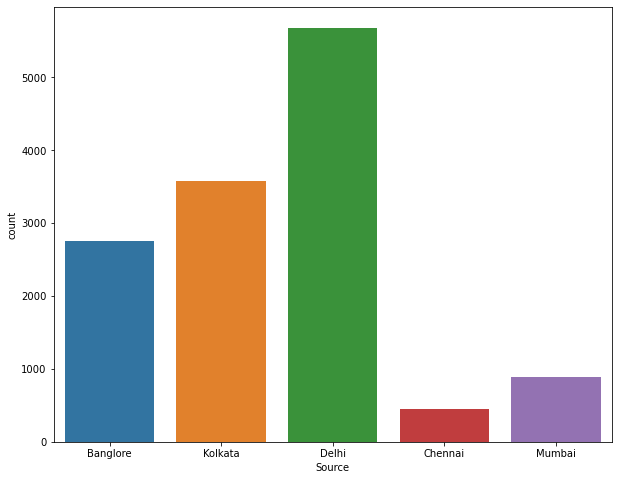

In [17]:
# Most People travelled from Delhi.
# We can visualize this in a countplot
plt.figure(figsize = (10,8))
sns.countplot(df['Source'])

In [18]:
df['Destination'].value_counts()

Cochin       5682
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='count'>

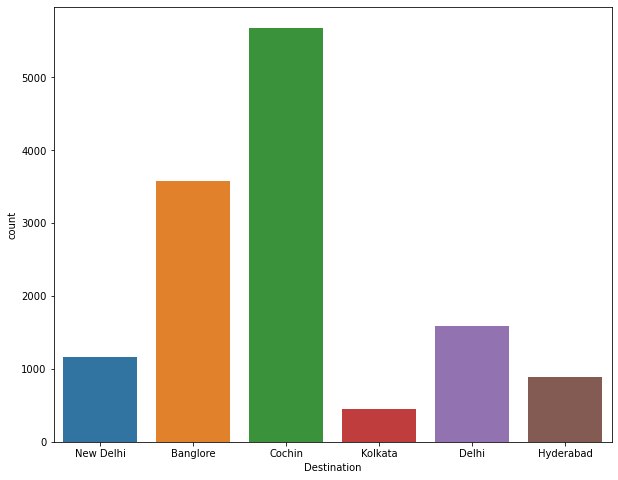

In [19]:
# Most people had their destination in Cochin
# There are people moving to Hyderabad,Cochin and New Delhi but no people moving from those places as per our data
# On the contrary,there are people moving from Chennai and Mumbai but not into those cities
# This might be an indication that our data was collected from Banglore,Delhi and Kolkata
# We can also Visualize this
plt.figure(figsize = (10,8))
sns.countplot(df['Destination'])

In [20]:
df['Route'].value_counts()

DEL → BOM → COK                3000
BLR → DEL                      1941
CCU → BOM → BLR                1232
CCU → BLR                       896
BOM → HYD                       785
                               ... 
CCU → RPR → HYD → BLR             1
BLR → HBX → BOM → BHO → DEL       1
BOM → NDC → HYD                   1
BOM → BBI → HYD                   1
BOM → IXC → DEL → HYD             1
Name: Route, Length: 132, dtype: int64

In [21]:
# There are routes that are common and routes rarely used as seen from our data.
# We can say that the most common routes have approximately the same price apart from the business and premium class

In [22]:
print(df['Dep_Time'].value_counts(),"\n\n")
df['Arrival_Time'].unique()

18:55    288
17:00    275
10:00    265
07:05    240
07:10    239
        ... 
22:30      1
21:40      1
12:45      1
12:05      1
03:00      1
Name: Dep_Time, Length: 223, dtype: int64 




array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '00:20 07 Mar',
       '00:20 02 Apr', '07:45 13 May'], dtype=object)

In [23]:
# Time is in 24 hrs system and this will be converted in a proper format that our model will understand.
# Arrrival Time has month variable too,but from our airline travel dates,the last day in the month is 27 that means that for a passeneger to arrive at
# a latter month,he/she has to take 3 days in airplane which is a bit absurd. We will look more into it in the feature Engineering step.
# We will generate a timestamp to subtract the arrival time from departure time to get an in depth analysis of this.

In [24]:
df['Duration'].value_counts()

2h 50m     672
1h 30m     493
2h 45m     432
2h 55m     418
2h 35m     399
          ... 
37h 10m      1
31h 50m      1
29h 10m      1
35h 20m      1
20h 30m      1
Name: Duration, Length: 374, dtype: int64

In [25]:
#Some flights have over 24 hrs Duration.
#No flight has over 72 hrs in flight duration which makes our desire to remove month from arrival time feature easier and more sensical

In [26]:
df['Total_Stops'].value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [27]:
# Most flights are two, one or non-stop.Few of them have three stops and thius with four stops must have a difficulty while in the air forcing them 
# to make an emergency stop but we cannot be certain.

In [28]:
df['Additional_Info'].value_counts()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: Additional_Info, dtype: int64

In [29]:
# There are two no info's - 'No info' and 'No Info'.We can take to mean the same thing and we will convert them in feature Engineering step.


<AxesSubplot:xlabel='Price', ylabel='Count'>

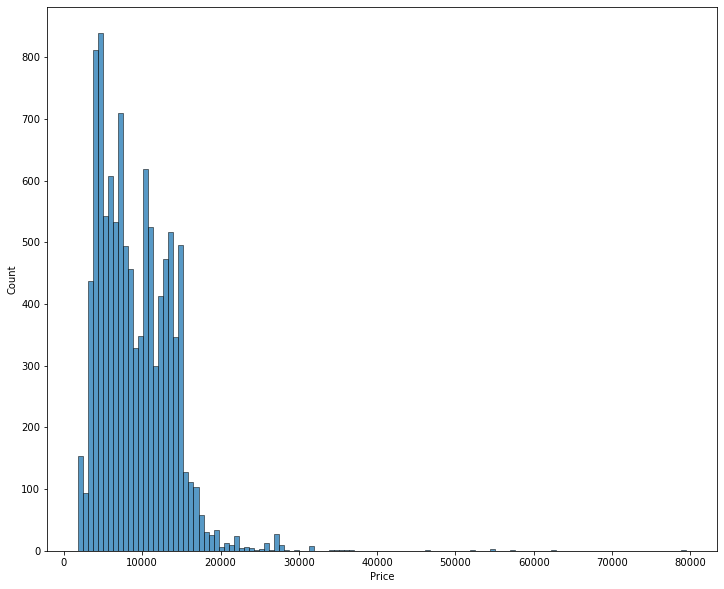

In [30]:
# Lets Observe the distribution of our Target Variable
plt.figure(figsize = (12,10))
sns.histplot(df['Price'])

In [31]:
# They seem to take a left skew


## Feature Engineering

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.5+ MB


In [33]:
#We can drop the null values since they are only two

df[df['Route'].isnull()] # index 9039

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0


In [34]:
df[df['Total_Stops'].isnull()] # index 9039

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480.0


In [35]:
# It is the same observation so we drop it
df = df.drop(9039,axis = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13353 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13353 non-null  object 
 1   Date_of_Journey  13353 non-null  object 
 2   Source           13353 non-null  object 
 3   Destination      13353 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13353 non-null  object 
 6   Arrival_Time     13353 non-null  object 
 7   Duration         13353 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13353 non-null  object 
 10  Price            10682 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [36]:
#Let us now work with the date and time features.
df['Date_of_Journey'].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [37]:
#We can make two new columns containing the day and month 

df['Day_of_Journey'] = df['Date_of_Journey'].str.split('/').str[0] #Day
df['Month_of_Journey'] = df['Date_of_Journey'].str.split('/').str[1] #Month

In [38]:
df.drop(columns = 'Date_of_Journey',inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13353 entries, 0 to 2670
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13353 non-null  object 
 1   Source            13353 non-null  object 
 2   Destination       13353 non-null  object 
 3   Route             13353 non-null  object 
 4   Dep_Time          13353 non-null  object 
 5   Arrival_Time      13353 non-null  object 
 6   Duration          13353 non-null  object 
 7   Total_Stops       13353 non-null  object 
 8   Additional_Info   13353 non-null  object 
 9   Price             10682 non-null  float64
 10  Day_of_Journey    13353 non-null  object 
 11  Month_of_Journey  13353 non-null  object 
dtypes: float64(1), object(11)
memory usage: 1.3+ MB


In [39]:
df['Day_of_Journey'] = df['Day_of_Journey'].astype(int)
df['Month_of_Journey'] = df['Month_of_Journey'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13353 entries, 0 to 2670
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13353 non-null  object 
 1   Source            13353 non-null  object 
 2   Destination       13353 non-null  object 
 3   Route             13353 non-null  object 
 4   Dep_Time          13353 non-null  object 
 5   Arrival_Time      13353 non-null  object 
 6   Duration          13353 non-null  object 
 7   Total_Stops       13353 non-null  object 
 8   Additional_Info   13353 non-null  object 
 9   Price             10682 non-null  float64
 10  Day_of_Journey    13353 non-null  int32  
 11  Month_of_Journey  13353 non-null  int32  
dtypes: float64(1), int32(2), object(9)
memory usage: 1.2+ MB


In [40]:
#for Dept_time and Arrival time,we can use a LabelEncoder.
times = df['Dep_Time'].value_counts().sort_index().index

In [41]:
encoded = {}
for i,j in zip(times,range(1,234)):
  encoded[i] = j

In [42]:
df['Departure_Time'] = df['Dep_Time'].map(encoded)

In [43]:
df.drop('Dep_Time',axis = 1,inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13353 entries, 0 to 2670
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13353 non-null  object 
 1   Source            13353 non-null  object 
 2   Destination       13353 non-null  object 
 3   Route             13353 non-null  object 
 4   Arrival_Time      13353 non-null  object 
 5   Duration          13353 non-null  object 
 6   Total_Stops       13353 non-null  object 
 7   Additional_Info   13353 non-null  object 
 8   Price             10682 non-null  float64
 9   Day_of_Journey    13353 non-null  int32  
 10  Month_of_Journey  13353 non-null  int32  
 11  Departure_Time    13353 non-null  int64  
dtypes: float64(1), int32(2), int64(1), object(8)
memory usage: 1.2+ MB


In [44]:
df['Departure_Time'] = df['Departure_Time'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13353 entries, 0 to 2670
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13353 non-null  object 
 1   Source            13353 non-null  object 
 2   Destination       13353 non-null  object 
 3   Route             13353 non-null  object 
 4   Arrival_Time      13353 non-null  object 
 5   Duration          13353 non-null  object 
 6   Total_Stops       13353 non-null  object 
 7   Additional_Info   13353 non-null  object 
 8   Price             10682 non-null  float64
 9   Day_of_Journey    13353 non-null  int32  
 10  Month_of_Journey  13353 non-null  int32  
 11  Departure_Time    13353 non-null  int32  
dtypes: float64(1), int32(3), object(8)
memory usage: 1.2+ MB


In [45]:
#Let drop month from Arrival Time
arrivals = df['Arrival_Time'].str.split(' ').str[0]
arrivals

0       01:10
1       13:15
2       04:25
3       23:30
4       21:35
        ...  
2666    20:25
2667    16:55
2668    04:25
2669    19:15
2670    19:15
Name: Arrival_Time, Length: 13353, dtype: object

In [46]:
df['Arrival_Hour'] = arrivals.str.split(':').str[0]
df['Arrival_Minute'] = arrivals.str.split(':').str[1]
df.drop(columns = 'Arrival_Time',inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13353 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13353 non-null  object 
 1   Source            13353 non-null  object 
 2   Destination       13353 non-null  object 
 3   Route             13353 non-null  object 
 4   Duration          13353 non-null  object 
 5   Total_Stops       13353 non-null  object 
 6   Additional_Info   13353 non-null  object 
 7   Price             10682 non-null  float64
 8   Day_of_Journey    13353 non-null  int32  
 9   Month_of_Journey  13353 non-null  int32  
 10  Departure_Time    13353 non-null  int32  
 11  Arrival_Hour      13353 non-null  object 
 12  Arrival_Minute    13353 non-null  object 
dtypes: float64(1), int32(3), object(9)
memory usage: 1.3+ MB


In [47]:
df['Arrival_Hour'] = df['Arrival_Hour'].astype(int)
df['Arrival_Minute'] = df['Arrival_Minute'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13353 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13353 non-null  object 
 1   Source            13353 non-null  object 
 2   Destination       13353 non-null  object 
 3   Route             13353 non-null  object 
 4   Duration          13353 non-null  object 
 5   Total_Stops       13353 non-null  object 
 6   Additional_Info   13353 non-null  object 
 7   Price             10682 non-null  float64
 8   Day_of_Journey    13353 non-null  int32  
 9   Month_of_Journey  13353 non-null  int32  
 10  Departure_Time    13353 non-null  int32  
 11  Arrival_Hour      13353 non-null  int32  
 12  Arrival_Minute    13353 non-null  int32  
dtypes: float64(1), int32(5), object(7)
memory usage: 1.2+ MB


In [48]:
#We can convert Duration Into hours and minutes
df['duration_hours'] = df['Duration'].str.split('h').str[0]  #get hours

In [49]:
minutes = df['Duration'].str.split(' ').str[1]
minutes.str.split('m').str[0]

0        50
1        25
2       NaN
3        25
4        45
       ... 
2666     55
2667     35
2668     35
2669     15
2670     20
Name: Duration, Length: 13353, dtype: object

In [50]:
df['duration_minutes'] = minutes.str.split('m').str[0] #get minutes

In [51]:
#5 minutes is not a valid flight duration so we can s
df[df['duration_hours'] == '5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Departure_Time,Arrival_Hour,Arrival_Minute,duration_hours,duration_minutes
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2 stops,No info,17327.0,6,3,150,16,55,5m,NaN
2660,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2 stops,No info,NaN,12,3,150,16,55,5m,NaN


In [52]:
df = df.drop(6474)

In [53]:
df[df['duration_hours'] == '5m'].index

Int64Index([2660], dtype='int64')

In [54]:
df['duration_hours'].loc[df['duration_hours'] == '5m'] = 5

In [55]:
df['duration_hours'] = df['duration_hours'].astype(int)

In [56]:
# The null values in duration_minutes are from those durations that did not have minutes
# We can therefore fill them with zeros

df['duration_minutes'] = df['duration_minutes'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13352 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13352 non-null  object 
 1   Source            13352 non-null  object 
 2   Destination       13352 non-null  object 
 3   Route             13352 non-null  object 
 4   Duration          13352 non-null  object 
 5   Total_Stops       13352 non-null  object 
 6   Additional_Info   13352 non-null  object 
 7   Price             10681 non-null  float64
 8   Day_of_Journey    13352 non-null  int32  
 9   Month_of_Journey  13352 non-null  int32  
 10  Departure_Time    13352 non-null  int32  
 11  Arrival_Hour      13352 non-null  int32  
 12  Arrival_Minute    13352 non-null  int32  
 13  duration_hours    13352 non-null  int32  
 14  duration_minutes  13352 non-null  object 
dtypes: float64(1), int32(6), object(8)
memory usage: 1.3+ MB


In [57]:
#We can now drop thE Duration columns
df.drop(columns = 'Duration',axis = 1,inplace = True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13352 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13352 non-null  object 
 1   Source            13352 non-null  object 
 2   Destination       13352 non-null  object 
 3   Route             13352 non-null  object 
 4   Total_Stops       13352 non-null  object 
 5   Additional_Info   13352 non-null  object 
 6   Price             10681 non-null  float64
 7   Day_of_Journey    13352 non-null  int32  
 8   Month_of_Journey  13352 non-null  int32  
 9   Departure_Time    13352 non-null  int32  
 10  Arrival_Hour      13352 non-null  int32  
 11  Arrival_Minute    13352 non-null  int32  
 12  duration_hours    13352 non-null  int32  
 13  duration_minutes  13352 non-null  object 
dtypes: float64(1), int32(6), object(7)
memory usage: 1.2+ MB


In [59]:
#We can get dummies for this Airline.We can also get dummies for Source,Destination,Total Stops and Additional Info.
#We can also drop the route because we already have the source and destination which is informative enough.

df.drop(columns = 'Route',inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13352 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13352 non-null  object 
 1   Source            13352 non-null  object 
 2   Destination       13352 non-null  object 
 3   Total_Stops       13352 non-null  object 
 4   Additional_Info   13352 non-null  object 
 5   Price             10681 non-null  float64
 6   Day_of_Journey    13352 non-null  int32  
 7   Month_of_Journey  13352 non-null  int32  
 8   Departure_Time    13352 non-null  int32  
 9   Arrival_Hour      13352 non-null  int32  
 10  Arrival_Minute    13352 non-null  int32  
 11  duration_hours    13352 non-null  int32  
 12  duration_minutes  13352 non-null  object 
dtypes: float64(1), int32(6), object(6)
memory usage: 1.1+ MB


In [60]:
# Let clean our Additional Info
df['Additional_Info'].value_counts()

No info                         10491
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: Additional_Info, dtype: int64

In [61]:
#Lets make No info and No Info the same
df['Additional_Info'].loc[df['Additional_Info'] == 'No Info'] = 'No info'
df['Additional_Info'].value_counts()

No info                         10494
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: Additional_Info, dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13352 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13352 non-null  object 
 1   Source            13352 non-null  object 
 2   Destination       13352 non-null  object 
 3   Total_Stops       13352 non-null  object 
 4   Additional_Info   13352 non-null  object 
 5   Price             10681 non-null  float64
 6   Day_of_Journey    13352 non-null  int32  
 7   Month_of_Journey  13352 non-null  int32  
 8   Departure_Time    13352 non-null  int32  
 9   Arrival_Hour      13352 non-null  int32  
 10  Arrival_Minute    13352 non-null  int32  
 11  duration_hours    13352 non-null  int32  
 12  duration_minutes  13352 non-null  object 
dtypes: float64(1), int32(6), object(6)
memory usage: 1.1+ MB


In [63]:
cat_cols = df[['Airline','Source','Destination','Total_Stops','Additional_Info']]

df = pd.get_dummies(df,columns =cat_cols.columns,drop_first=True)
df.head()

,Price,Day_of_Journey,Month_of_Journey,Departure_Time,Arrival_Hour,Arrival_Minute,duration_hours,duration_minutes,Airline_Air India,Airline_GoAir,...,Total_Stops_4 stops,Total_Stops_non-stop,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,3897.0,24,3,212,1,10,2,50,0,0,...,0,1,0,0,0,0,0,0,1,0
1,7662.0,1,5,32,13,15,7,25,1,0,...,0,0,0,0,0,0,0,0,1,0
2,13882.0,9,6,71,4,25,19,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6218.0,12,5,165,23,30,5,25,0,0,...,0,0,0,0,0,0,0,0,1,0
4,13302.0,1,3,150,21,35,4,45,0,0,...,0,0,0,0,0,0,0,0,1,0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13352 entries, 0 to 2670
Data columns (total 40 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Price                                         10681 non-null  float64
 1   Day_of_Journey                                13352 non-null  int32  
 2   Month_of_Journey                              13352 non-null  int32  
 3   Departure_Time                                13352 non-null  int32  
 4   Arrival_Hour                                  13352 non-null  int32  
 5   Arrival_Minute                                13352 non-null  int32  
 6   duration_hours                                13352 non-null  int32  
 7   duration_minutes                              13352 non-null  object 
 8   Airline_Air India                             13352 non-null  uint8  
 9   Airline_GoAir                                 13352 non-null  

In [65]:
test = df[df['Price'].isnull()]
test.head()

,Price,Day_of_Journey,Month_of_Journey,Departure_Time,Arrival_Hour,Arrival_Minute,duration_hours,duration_minutes,Airline_Air India,Airline_GoAir,...,Total_Stops_4 stops,Total_Stops_non-stop,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,NaN,6,6,158,4,25,10,55,0,0,...,0,0,0,0,0,0,0,0,1,0
1,NaN,12,5,38,10,20,4,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,NaN,21,5,177,19,0,23,45,0,0,...,0,0,0,0,0,0,1,0,0,0
3,NaN,21,5,56,21,0,13,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,NaN,24,6,223,2,45,2,50,0,0,...,0,1,0,0,0,0,0,0,1,0


In [66]:
test.drop(columns = 'Price',inplace= True)

In [67]:
train = df[df['Price'].notnull()]
test.head()

,Day_of_Journey,Month_of_Journey,Departure_Time,Arrival_Hour,Arrival_Minute,duration_hours,duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Total_Stops_4 stops,Total_Stops_non-stop,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,6,6,158,4,25,10,55,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,12,5,38,10,20,4,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,21,5,177,19,0,23,45,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,21,5,56,21,0,13,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,24,6,223,2,45,2,50,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [68]:
X =train.drop(columns = 'Price')
y = train['Price']

In [69]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 17)
print(X_train.shape,X_test.shape)

(8010, 39) (2671, 39)


In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
from sklearn.linear_model import LinearRegression

lg = LinearRegression()
lg.fit(X_train,y_train)

LinearRegression()

In [72]:
y_pred = lg.predict(X_test)
y_pred_ = lg.predict(X_train)

In [73]:
from sklearn.metrics import r2_score

print("Linear Regression train r2_score:",r2_score(y_pred = y_pred_,y_true = y_train))
print("Linear Regression test r2_score:",r2_score(y_pred = y_pred,y_true = y_test))

Linear Regression train r2_score: 0.6934072195502172
Linear Regression test r2_score: 0.7018131418124174


In [74]:
from sklearn.ensemble import RandomForestRegressor

rfg = RandomForestRegressor()
rfg.fit(X_train,y_train)

RandomForestRegressor()

In [75]:
y_pred = rfg.predict(X_test)
y_pred_ = rfg.predict(X_train)

In [76]:
print("Random Forest Regressor train r2_score:",r2_score(y_pred = y_pred_,y_true = y_train))
print("Random Forest Regressor test r2_score:",r2_score(y_pred = y_pred,y_true = y_test))

Random Forest Regressor train r2_score: 0.9820365057570534
Random Forest Regressor test r2_score: 0.8773374538959026


In [77]:
from sklearn.neighbors import KNeighborsRegressor

KN =  KNeighborsRegressor()
KN.fit(X_train,y_train)

KNeighborsRegressor()

In [78]:
y_pred_ = KN.predict(X_train)
y_pred = KN.predict(X_test)

In [79]:
print("K Neighbors Regressor train r2_score:",r2_score(y_pred = y_pred_,y_true = y_train))
print("K Neighbors Regressor test r2_score:",r2_score(y_pred = y_pred,y_true = y_test))

K Neighbors Regressor train r2_score: 0.8778033748673397
K Neighbors Regressor test r2_score: 0.8327511399035745
